In [1]:
%matplotlib inline

import random

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_context("talk")

# Anscombe's quartet

Anscombe's quartet comprises of four datasets, and is rather famous. Why? You'll find out in this exercise.

In [2]:
anascombe = pd.read_csv('data/anscombe.csv')
anascombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


## Part 1

For each of the four datasets...
### mean and variance
Compute the mean and variance of both **x** and **y**

In [3]:
x = anascombe["x"]
y = anascombe["y"]
print("----------------- mean ----------------------")
print(anascombe.groupby("dataset").mean())
print("--------------- variance --------------------")
print(anascombe.groupby("dataset").var())

----------------- mean ----------------------
           x         y
dataset               
I        9.0  7.500909
II       9.0  7.500909
III      9.0  7.500000
IV       9.0  7.500909
--------------- variance --------------------
            x         y
dataset                
I        11.0  4.127269
II       11.0  4.127629
III      11.0  4.122620
IV       11.0  4.123249


 ### correlation coefficient 
 Compute the correlation coefficient between **x** and **y**

In [4]:
anascombe.groupby("dataset").corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### linear regression 
Compute the linear regression line: $y = \beta_0 + \beta_1 x + \epsilon$ (hint: use statsmodels and look at the Statsmodels notebook)

In [12]:
lin_model = smf.ols("y ~ x", anascombe[anascombe["dataset"]=="I"]).fit()
lin_model.summary()

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 13 Jun 2018   Prob (F-statistic):            0.00217
Time:                        17:47:19   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: x and y must have same first dimension, but have shapes (44,) and (11,)

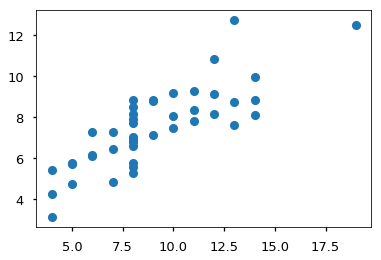

In [13]:
f, ax = plt.subplots()
ax.plot(x, y, 'o', label="data")
ax.plot(x, lin_model.fittedvalues, 'r--.', label="OLS")


## Part 2

Using Seaborn, visualize all four datasets. 

*hint: use sns.FacetGrid combined with plt.scatter*

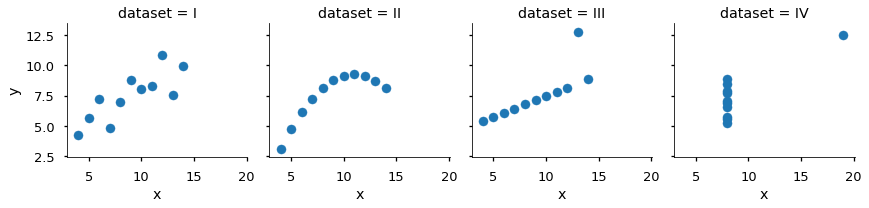

In [14]:
g = sns.FacetGrid(anascombe, col="dataset")
g.map(plt.scatter, "x", "y")